# Context
This project was conducted for a palm oil plantation (approximately 100 rai/16 hectares) in the southern region of Thailand. The plantation reportedly performed unusually worse in 2023, despite maintaining a profitable record and consistent yields.<br>
Thus, this notebook was created in part to provide quantitative evidence that something was wrong with the financial report, but also to highlight potential opportunities for improving key performance indicators (KPIs), primarily production yield when compared to industry standards. <br>

**Methodology** <br>
Market pricing for palm kernels obtained from:
https://www.opsmoac.go.th/phangnga-news-news_release (in Thai)
<br>As far as I am aware, the Phang Nga Provincial Agriculture and Cooperatives Office (PPACO) provides the most relevant local market prices for the plantation I investigated, as it is located in Phang Nga, though not in the same prefecture. Pricing can vary between prefectures due to the absence of major industrial producers. <br>In this case, locally produced palms are sold to an intermediary company, which is what the plantation did.

To minimise selection bias, I take the range of prices by selecting a minimum and maximum between two companies across multiple days then calculate the median. 
<ul><li>If multiple dates were given (28th - 29th April), consider these dates as late April and use the minimum and maximum price within the timeframe. </ul>

**Fig1.** and **Fig2.** illustrates on how this was decided. 


<img src ="palm-figures\palmprice-lateapr-fig.png"> <br>
**Fig1.** Table showing the asking price (THB/kg) from two main palm oil producers in PhangNga province for late April 2024. Source: PhangNga Provincial Agriculture and Cooperatives Office (PPACO). <br>The PPACO provides pricing on a two-day basis.  Boxed in red are the dates taken into account. Green circles indicate the selected price. The red cross indicates that prices on each date is 'ignored' as both the minimum and maximum price are offered by one company.

<img src ="palm-figures\palmprice-earlyapr-fig.png"><br>
**Fig2.** Second example demonstrating how pricing was obtained from publicly available data from two main palm oil producers in PhangNga province for early April 2024. Source: PhangNga Provincial Agriculture and Cooperatives Office (PPACO). Green circles indicate selected price. 

<br>In retrospect, using the first and last days of each month may not show much difference, as trade prices can stabilize for weeks or be affected by holidays like New Year's, which can pause trade prices inbetween the monitored period. This is somewhat offset by longitudinal sampling. I also did not account for the bonus on high-quality palm yields due to limited information in the financial statements and local pricing variations, it was unclear if the crop was sold at the best price.

In [2]:
#Import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [3]:
#Importing monthly pricing
#Check if spreadsheet directory exists
if os.path.exists('./data'):
    oil_palm_prices = pd.read_csv('jun-palm-price.csv')
else:
    raise FileNotFoundError

In [4]:
oil_palm_prices.head()

,Province,Year,Date,Min price,Max price
0,PhangNga,2024,Late May,3.80,4.5
1,PhangNga,2024,Early May,4.20,5.0
2,PhangNga,2024,Late Apr,4.40,5.0
3,PhangNga,2024,Early Apr,5.05,5.7
4,PhangNga,2024,Late Mar,5.55,6.0


In [5]:
#Check column data types
oil_palm_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   43 non-null     object 
 1   Year       43 non-null     int64  
 2   Date       43 non-null     object 
 3   Min price  43 non-null     float64
 4   Max price  43 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ KB


In [6]:
#Calculate median
oil_palm_prices["Median price"] = oil_palm_prices[['Min price','Max price']].median(axis=1)
oil_palm_prices.head()

,Province,Year,Date,Min price,Max price,Median price
0,PhangNga,2024,Late May,3.80,4.5,4.150
1,PhangNga,2024,Early May,4.20,5.0,4.600
2,PhangNga,2024,Late Apr,4.40,5.0,4.700
3,PhangNga,2024,Early Apr,5.05,5.7,5.375
4,PhangNga,2024,Late Mar,5.55,6.0,5.775


In [7]:
#Select 2023 data
oil_palm_prices.loc[oil_palm_prices['Year'] == 2023].head()

,Province,Year,Date,Min price,Max price,Median price
10,PhangNga,2023,Late Dec,5.5,5.9,5.70
11,PhangNga,2023,Early Dec,5.4,6.0,5.70
12,PhangNga,2023,Late Nov,5.4,6.0,5.70
13,PhangNga,2023,Early Nov,5.7,6.4,6.05
14,PhangNga,2023,Late Oct,5.7,6.4,6.05


Initially, I obtained data from another province (Surat Thani) but eventually found data that is more regionally relevant to the plantation after digging further.

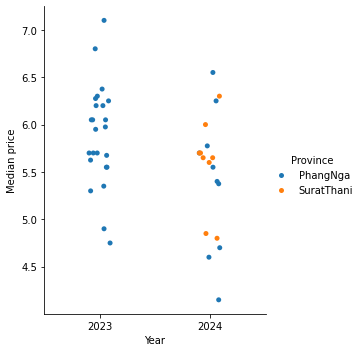

In [8]:
sns.catplot(data=oil_palm_prices,x='Year',y='Median price',hue='Province',
            aspect=0.8)

Assigning variables for KPIs. <br>
 

In [9]:
#Workers reported that 1500 palm trees have been planted, as of May 2024. Total plantation area = 100 rai (16 hectares)
max_harvest = float(1500) #Assuming 100% harvesting efficiency per round
min_harvest = float(375) #Assuming 25% harvesting efficiency per round
#Approximate median mass (kg) of harvested palm per bunch; typically 20 - 25kg (Carr, 2011)
median_fruit_mass = float(22.5)
#A palm oil tree typically produces 4 fruit bunches
fruit_per_tree = float(4)
#Assumed actual kg sold per harvest round, according to worker; will need to record this in the future
kg_sold = 10000

#Logistics info obtained from multiple sources
# 6-wheeler lorry: 7 tons/trip; 7000kg/trip
# pickup: 3 tons/trip; 3000kg/trip - typically 3 or 4 trips every round

I also calculate predicted earnings for the maximum and minimum theoretical yields.<br>
Palm oils 'fruit' approximately twice per month. Thus, they are harvested and sold every ~2 - 2.5 weeks.<br>
The column `Actual est.  sales` attempts to obtain the actual revenue earned by the plantation per harvest period.

In [10]:
oil_palm_prices['Theor.max bimonthly sales'] = ((oil_palm_prices['Median price']*median_fruit_mass)*fruit_per_tree)*max_harvest
oil_palm_prices['Theor.min bimonthly sales'] = ((oil_palm_prices['Median price']*median_fruit_mass)*fruit_per_tree)*min_harvest
oil_palm_prices['Actual est. sales'] = ((oil_palm_prices['Median price'])*kg_sold)
oil_palm_prices

,Province,Year,Date,Min price,Max price,Median price,Theor.max bimonthly sales,Theor.min bimonthly sales,Actual est. sales
0,PhangNga,2024,Late May,3.80,4.50,4.150,560250.0,140062.50,41500.0
1,PhangNga,2024,Early May,4.20,5.00,4.600,621000.0,155250.00,46000.0
2,PhangNga,2024,Late Apr,4.40,5.00,4.700,634500.0,158625.00,47000.0
3,PhangNga,2024,Early Apr,5.05,5.70,5.375,725625.0,181406.25,53750.0
4,PhangNga,2024,Late Mar,5.55,6.00,5.775,779625.0,194906.25,57750.0
5,PhangNga,2024,Early Mar,5.10,5.70,5.400,729000.0,182250.00,54000.0
6,PhangNga,2024,Late Feb,5.40,5.70,5.550,749250.0,187312.50,55500.0
7,PhangNga,2024,Early Feb,6.10,6.40,6.250,843750.0,210937.50,62500.0
8,PhangNga,2024,Late Jan,6.20,6.90,6.550,884250.0,221062.50,65500.0
9,PhangNga,2024,Early Jan,5.50,5.90,5.700,769500.0,192375.00,57000.0


# 2024 revenue prediction

In [11]:
if os.path.exists('./data'):
    phangnga_prices = pd.read_csv('phangnga-jun-palm-prices.csv',parse_dates=['Date'],dayfirst=True)
    phangnga_prices["Median price"] = phangnga_prices[['Min price','Max price']].median(axis=1) #calculate median price from existing columns
    
else:
    raise FileNotFoundError

phangnga_prices.head()

,Province,Date,Min price,Max price,Median price
0,PhangNga,2024-05-30,3.80,4.5,4.150
1,PhangNga,2024-05-01,4.20,5.0,4.600
2,PhangNga,2024-04-29,4.40,5.0,4.700
3,PhangNga,2024-04-02,5.05,5.7,5.375
4,PhangNga,2024-03-28,5.55,6.0,5.775


I separated data for Phang Nga from the previous dataframe and added specific dates (note: the first and last date were taken from the PPAO tables). <br>
I collected market prices starting from January 2023 until May 2024 (at the time of analysis). Ideally, I should have obtained more data further in the past (at least 3 years) to identify potential seasonal trends and create more accurate price predictions. 

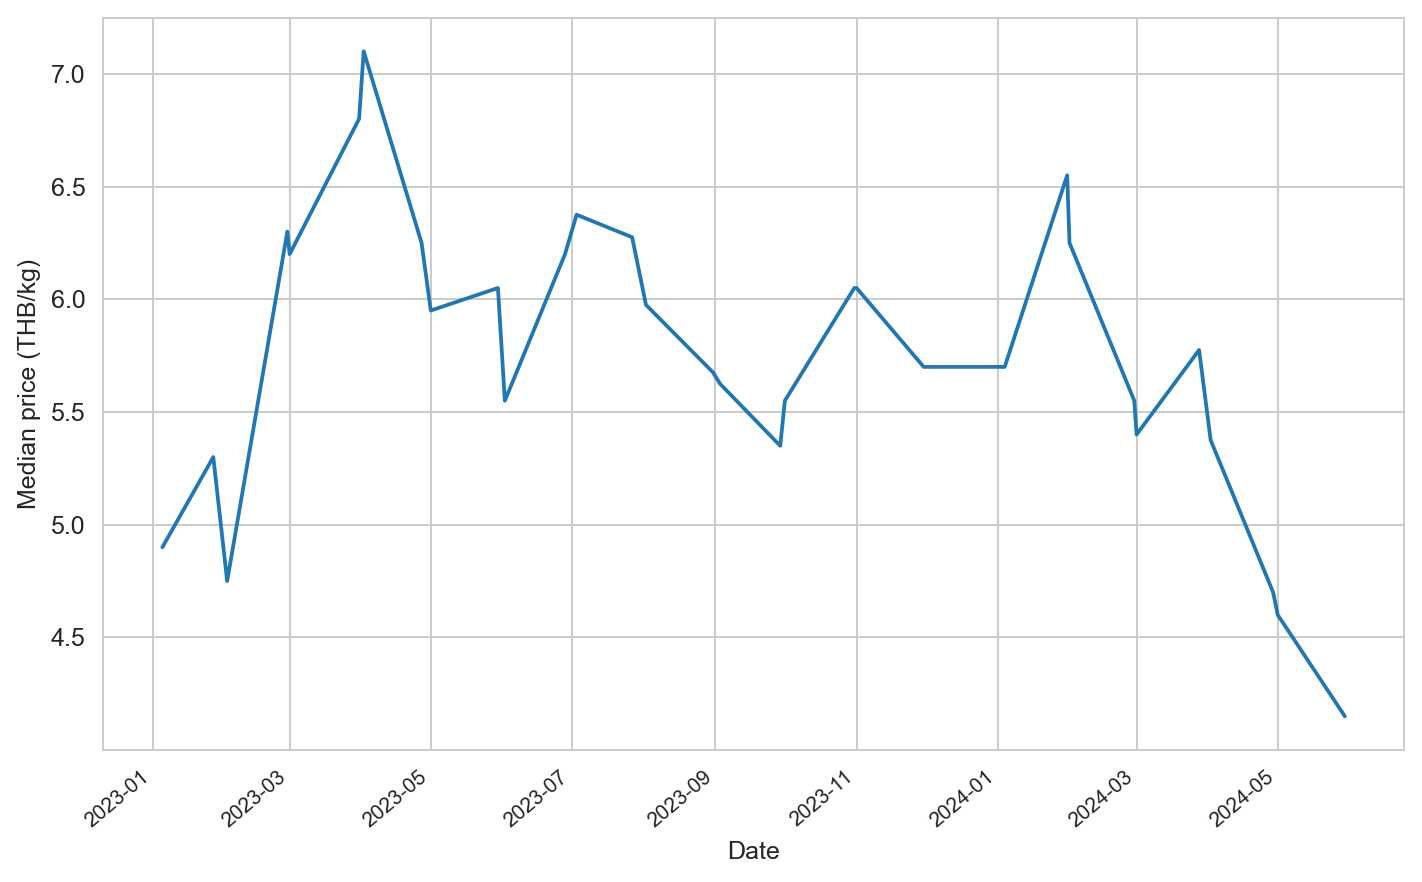

In [12]:
#A quick line plot to visualise the data
plt.figure(figsize=(8,5),dpi=180)
sns.set_style("whitegrid")
ax = sns.lineplot(phangnga_prices,x='Date',y='Median price')
ax.set(ylabel='Median price (THB/kg)')
plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.tight_layout()
plt.show()

# Data QC

Here, I test out a rolling average approach to predict the market price for the remainder of 2024.
Beforehand, I run an autocorrelation test to verify that the data are not biased.

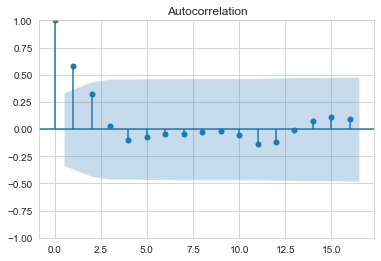

In [13]:
import statsmodels.api as sm
#dir(sm.tsa)
price_series = phangnga_prices.filter(['Date','Median price'],axis=1)
sm.graphics.tsa.plot_acf(price_series['Median price'])
plt.show()

Autocorrelation plot shows each price point are not correlated (points stay within blue-shaded region), given a CI of 95%. <br>
Next, I use a function from stattools to perform an Augmented Dickey-Fuller test to obtain statistics needed for a SARIMA. <br>
The justification behind this is to reveal potential seasonal trends in pricing but as mentioned, a 1-year window is not long enough to do so. 

In [14]:
adfTest = sm.tsa.stattools.adfuller(price_series['Median price'],autolag='AIC')
adfOutput = pd.Series(adfTest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key,value in adfTest[4].items():
    adfOutput['Critical value (%s)'%key] = value
print(f'Augmented Dickey-Fuller test:\n{adfOutput}')

Augmented Dickey-Fuller test:
Test statistic              -2.802414
p-value                      0.057930
#Lags used                   3.000000
No. of observations used    30.000000
Critical value (1%)         -3.669920
Critical value (5%)         -2.964071
Critical value (10%)        -2.621171
dtype: float64


p > 0.05; thus, the null hypothesis is accepted indicating that the data is not stationary.

Given possible seasonal influences, a SARIMA test was used to determine the remaining palm oil prices for the latter half of 2024.<br>
Given that the first two points in the ACF plot are above the CI threshold, we take the third order of `p = 3` in the `order()` parameter. <br>
Furthermore, setting `q = 1` provided more reasonable predictions (lest the palm oil market is heavily influenced by other factors), as opposed to `q = 2` or `q = 3`.

In [15]:
model = sm.tsa.SARIMAX(price_series['Median price'],order=(3,1,0),seasonal_order=(1,0,0,12)) #12 month basis
model_fit = model.fit()
#one step forecast
yhat = model_fit.forecast() 

In [16]:
#Next predicted median price points for late May - December 2024
yhat = model_fit.predict(start=2,end=16)
print(round((yhat),3))

2     4.535
3     4.691
4     5.272
5     5.723
6     5.446
7     5.518
8     6.159
9     6.511
10    5.815
11    5.682
12    5.737
13    5.566
14    5.949
15    5.845
16    5.461
Name: predicted_mean, dtype: float64


In [17]:
if os.path.exists('data'):
    predicted_prices = pd.read_csv('palm-price-sarima.csv',parse_dates=['Date'],dayfirst=True)
else:
    raise FileNotFoundError
predicted_prices.head()

,Province,Date,Median price,Actual/Predicted
0,PhangNga,2024-12-31,5.504,Predicted
1,PhangNga,2024-12-01,5.419,Predicted
2,PhangNga,2024-11-30,5.785,Predicted
3,PhangNga,2024-11-01,5.967,Predicted
4,PhangNga,2024-10-31,5.729,Predicted


I concatenate the simulated prices generated from the SARIMAX function to the line graph with actual market prices.

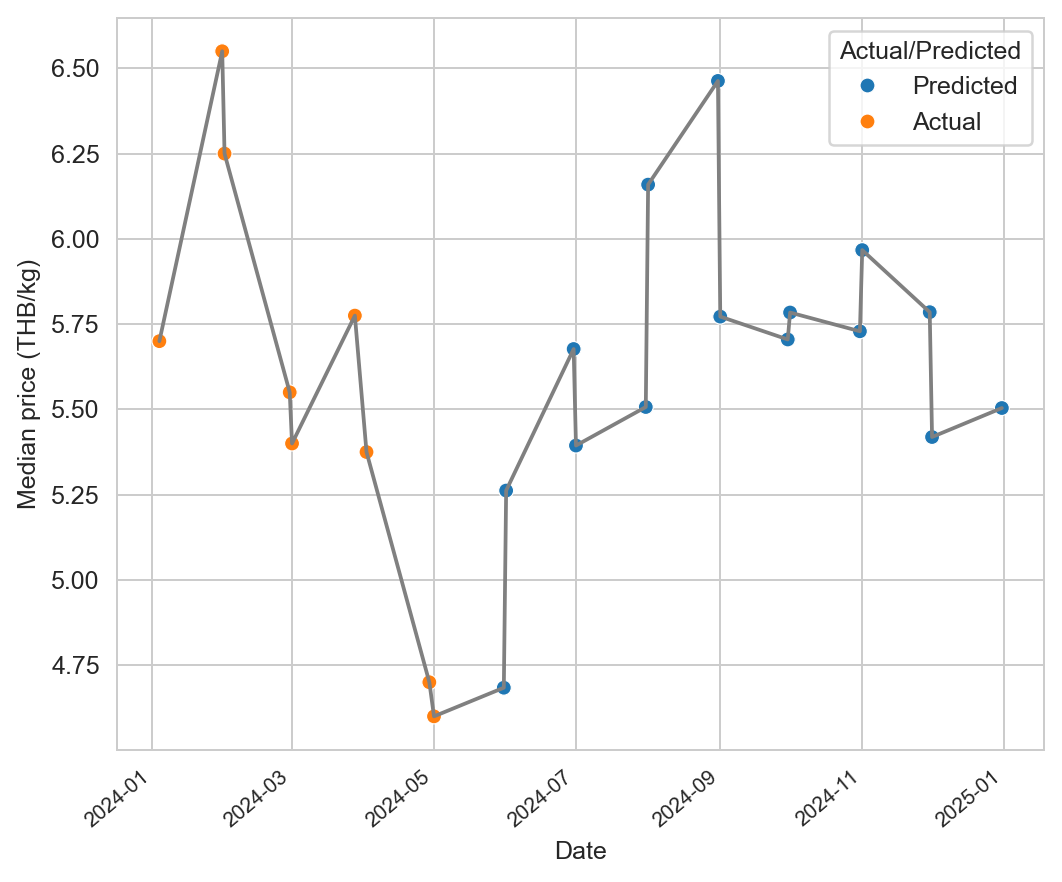

In [18]:
plt.figure(figsize=(6,5),dpi=180)
sns.set_style("whitegrid")
sns.lineplot(predicted_prices,x='Date',y='Median price',color="grey")
ax = sns.scatterplot(predicted_prices,x='Date',y='Median price',hue='Actual/Predicted')
ax.set(ylabel='Median price (THB/kg)')
plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.tight_layout()
plt.show()

In [19]:
predicted_prices['Actual est. sales'] = ((predicted_prices['Median price'])*kg_sold)
predicted_prices.loc['Total'] = predicted_prices[['Actual est. sales']].sum()

#Assign total revenue for later plotting and calculations
est_sales2024 = float(predicted_prices.loc['Total']['Actual est. sales'])

predicted_prices

C:\Users\piyak\AppData\Local\Temp\ipykernel_725548\2450568048.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predicted_prices.loc['Total'] = predicted_prices[['Actual est. sales']].sum()


,Province,Date,Median price,Actual/Predicted,Actual est. sales
0,PhangNga,2024-12-31,5.504,Predicted,55040.0
1,PhangNga,2024-12-01,5.419,Predicted,54190.0
2,PhangNga,2024-11-30,5.785,Predicted,57850.0
3,PhangNga,2024-11-01,5.967,Predicted,59670.0
4,PhangNga,2024-10-31,5.729,Predicted,57290.0
5,PhangNga,2024-10-01,5.784,Predicted,57840.0
6,PhangNga,2024-09-30,5.705,Predicted,57050.0
7,PhangNga,2024-09-01,5.772,Predicted,57720.0
8,PhangNga,2024-08-31,6.463,Predicted,64630.0
9,PhangNga,2024-08-01,6.159,Predicted,61590.0


Totalling revenue from both actual and predicted prices, the plantation should earn at least 1 million THB (~30,000 USD/~25,000 GBP) in 2024. Unless the palm oil market crashes.

NB: As of Dec 2024, prices have risen to around 8 THB/kg. We can expect the plantation to earn much more than this - if yields are good and there are no significant logistic bottlenecks (refer to powerpoint slides).

In [20]:
salesdf = oil_palm_prices.filter(['Province','Year','Date',
                                  'Theor.max bimonthly sales','Theor.min bimonthly sales',
                                  'Actual est. sales'],axis=1)
salesdf = salesdf[~salesdf['Province'].isin(['SuratThani'])]
salesdf.head()

,Province,Year,Date,Theor.max bimonthly sales,Theor.min bimonthly sales,Actual est. sales
0,PhangNga,2024,Late May,560250.0,140062.50,41500.0
1,PhangNga,2024,Early May,621000.0,155250.00,46000.0
2,PhangNga,2024,Late Apr,634500.0,158625.00,47000.0
3,PhangNga,2024,Early Apr,725625.0,181406.25,53750.0
4,PhangNga,2024,Late Mar,779625.0,194906.25,57750.0


In [21]:
sales2023df = salesdf.loc[salesdf['Year'] == 2023].copy()
sales2023df.loc['Total'] = sales2023df[['Theor.max bimonthly sales', 'Theor.min bimonthly sales','Actual est. sales']].sum()
sales2023df

,Province,Year,Date,Theor.max bimonthly sales,Theor.min bimonthly sales,Actual est. sales
10,PhangNga,2023.0,Late Dec,769500.0,192375.00,57000.0
11,PhangNga,2023.0,Early Dec,769500.0,192375.00,57000.0
12,PhangNga,2023.0,Late Nov,769500.0,192375.00,57000.0
13,PhangNga,2023.0,Early Nov,816750.0,204187.50,60500.0
14,PhangNga,2023.0,Late Oct,816750.0,204187.50,60500.0
15,PhangNga,2023.0,Early Oct,749250.0,187312.50,55500.0
16,PhangNga,2023.0,Late Sep,722250.0,180562.50,53500.0
17,PhangNga,2023.0,Early Sep,759375.0,189843.75,56250.0
18,PhangNga,2023.0,Late Aug,766125.0,191531.25,56750.0
19,PhangNga,2023.0,Early Aug,806625.0,201656.25,59750.0


In [22]:
sales2024df = salesdf.loc[salesdf['Year'] == 2024].copy()
sales2024df.loc['Total'] = sales2024df[['Theor.max bimonthly sales', 'Theor.min bimonthly sales','Actual est. sales']].sum()
sales2024df

,Province,Year,Date,Theor.max bimonthly sales,Theor.min bimonthly sales,Actual est. sales
0,PhangNga,2024.0,Late May,560250.0,140062.50,41500.0
1,PhangNga,2024.0,Early May,621000.0,155250.00,46000.0
2,PhangNga,2024.0,Late Apr,634500.0,158625.00,47000.0
3,PhangNga,2024.0,Early Apr,725625.0,181406.25,53750.0
4,PhangNga,2024.0,Late Mar,779625.0,194906.25,57750.0
5,PhangNga,2024.0,Early Mar,729000.0,182250.00,54000.0
6,PhangNga,2024.0,Late Feb,749250.0,187312.50,55500.0
7,PhangNga,2024.0,Early Feb,843750.0,210937.50,62500.0
8,PhangNga,2024.0,Late Jan,884250.0,221062.50,65500.0
9,PhangNga,2024.0,Early Jan,769500.0,192375.00,57000.0


In [23]:
#Harvest performance
theor_max_kg = max_harvest*median_fruit_mass*fruit_per_tree
theor_min_kg = min_harvest*median_fruit_mass*fruit_per_tree
print(f"Maximum fruit harvest bimonthly: {theor_max_kg} kg or {theor_max_kg/1000} metric tons")
print(f"Minimum fruit harvest bimonthly: {theor_min_kg} kg or {theor_min_kg/1000} metric tons")
maxKgPercDifference = round(((kg_sold/theor_max_kg)*100),2)
minKgPercDifference = round(((kg_sold/theor_min_kg)*100),2)
print(f"Percentage of actual:maximum theoretical harvest: {maxKgPercDifference}%")
print(f"Percentage of actual:minimum theoretical harvest: {minKgPercDifference}%")

Maximum fruit harvest bimonthly: 135000.0 kg or 135.0 metric tons
Minimum fruit harvest bimonthly: 33750.0 kg or 33.75 metric tons
Percentage of actual:maximum theoretical harvest: 7.41%
Percentage of actual:minimum theoretical harvest: 29.63%


At 17500kg
- Maximum fruit harvest bimonthly: 135000.0 kg or 135.0 metric tons
- Minimum fruit harvest bimonthly: 33750.0 kg or 33.75 metric tons
- Percentage difference of actual:maximum theoretical harvest: **-87.04%**
- Percentage difference of actual:minimum theoretical harvest: **-48.15%**

In [24]:
#2023 Sales comparison
actualRev2023 = float(790198.0) #Accounted revenue from 2023

max_sales2023 = float(sales2023df.loc['Total']['Theor.max bimonthly sales'])

min_sales2023 = float(sales2023df.loc['Total']['Theor.min bimonthly sales'])

est_sales2023 = float(sales2023df.loc['Total']['Actual est. sales'])

maxPercSales23 = round((actualRev2023/(max_sales2023)*100),2)

minPercSales23 = round((actualRev2023/(min_sales2023)*100),2)

print(f"Actual revenue earned (FY2023): {actualRev2023} THB\nMax theoretical revenue: {max_sales2023} THB" 
      f"\nMin theoretical revenue: {min_sales2023} THB\nActual percentage of maximum potential: {maxPercSales23}%"
      f"\nActual percentage of minimum potential: {minPercSales23}%")

#2022 sales comparison
actualRev2022 = float(1931861.5) #Accounted palm revenue from 2022 statement

maxPercSales22 = round((actualRev2022/(max_sales2023)*100),2)

minPercSales22 = round((actualRev2022/(min_sales2023)*100),2)
print(f"\nActual revenue earned (FY2022): {actualRev2022} THB\nMax theoretical revenue: {max_sales2023} THB" 
      f"\nMin theoretical revenue: {min_sales2023} THB\nActual percentage of maximum potential: {maxPercSales22}%"
      f"\nActual percentage of minimum potential: {minPercSales22}%")

#2021 sales
actualRev2021 = float(800824) #Accounted palm revenue from 2022 statement

maxPercSales21 = round((actualRev2021/(max_sales2023)*100),2)

minPercSales21 = round((actualRev2021/(min_sales2023)*100),2)
print(f"\nActual revenue earned (FY2021): {actualRev2021} THB\nMax theoretical revenue: {max_sales2023} THB" 
      f"\nMin theoretical revenue: {min_sales2023} THB\nActual percentage of maximum potential: {maxPercSales21}%"
      f"\nActual percentage of minimum potential: {minPercSales21}%")

Actual revenue earned (FY2023): 790198.0 THB
Max theoretical revenue: 19085625.0 THB
Min theoretical revenue: 4771406.25 THB
Actual percentage of maximum potential: 4.14%
Actual percentage of minimum potential: 16.56%

Actual revenue earned (FY2022): 1931861.5 THB
Max theoretical revenue: 19085625.0 THB
Min theoretical revenue: 4771406.25 THB
Actual percentage of maximum potential: 10.12%
Actual percentage of minimum potential: 40.49%

Actual revenue earned (FY2021): 800824.0 THB
Max theoretical revenue: 19085625.0 THB
Min theoretical revenue: 4771406.25 THB
Actual percentage of maximum potential: 4.2%
Actual percentage of minimum potential: 16.78%


# Data conversion

In [25]:
#Earnings into kg sold
avg_monthlyRev23 = actualRev2023/12 #THB / THB/kg
kgSoldperTree23 = avg_monthlyRev23/max_harvest
print(f"Average monthly revenue: {round(avg_monthlyRev23,2)} THB" 
      f"\nkg/tree: {round(kgSoldperTree23,2)}"
      f"\nbunches/tree: {round(kgSoldperTree23/median_fruit_mass)}")

#Rough estimate taken from tons sold by other palm plantations, obtained from discussions with several plantation owners.
plantation_average = float(75.00)
#Median tons sold per harvest round for 2022. Missing data for Jan - Mar 2022.
bimonthly_tons2022 = float(10.005)

#2019 kg sold/harvest - taken from 2019 statement. Information was very vague.
bimonthly_tons2019 = float(6.25)

Average monthly revenue: 65849.83 THB
kg/tree: 43.9
bunches/tree: 2


In [26]:
medprice2023Df = pd.DataFrame(oil_palm_prices.loc[oil_palm_prices['Year'] == 2023]['Median price']).copy()
medPrice2023 = medprice2023Df.median()
medPrice2023

Median price    5.9625
dtype: float64

In [105]:
bimonthly_tons2022

10.005

# Plots

Comparing harvest output. 
For the "Other" plantation data, I conferred with another plantation owner who grew about 500 palm trees which equates to 25 tons of yield. I then extrapolated this to 1500 palm trees to get a better sense of scale of output for a similarly sized plantation.   
est = estimated

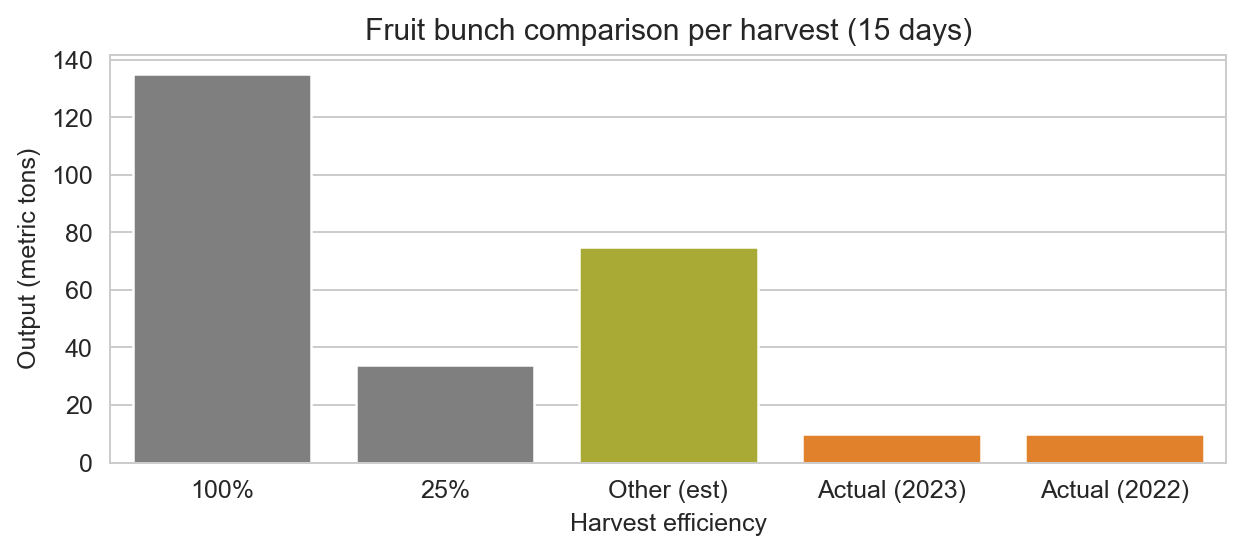

In [27]:
harvestDf = pd.DataFrame({'Harvest efficiency':['100%','25%','Other (est)','Actual (2023)','Actual (2022)'],'Output':[theor_max_kg/1000,theor_min_kg/1000,plantation_average,10000/1000,bimonthly_tons2022]})
plt.figure(figsize=(8,3),dpi=180)
ax= sns.barplot(harvestDf,x='Harvest efficiency',y='Output',palette=["tab:gray","tab:gray","tab:olive","tab:orange","tab:orange"], hue = "Harvest efficiency")
ax.set(xlabel="Harvest efficiency",ylabel='Output (metric tons)',title="Fruit bunch comparison per harvest (15 days)")
plt.show()

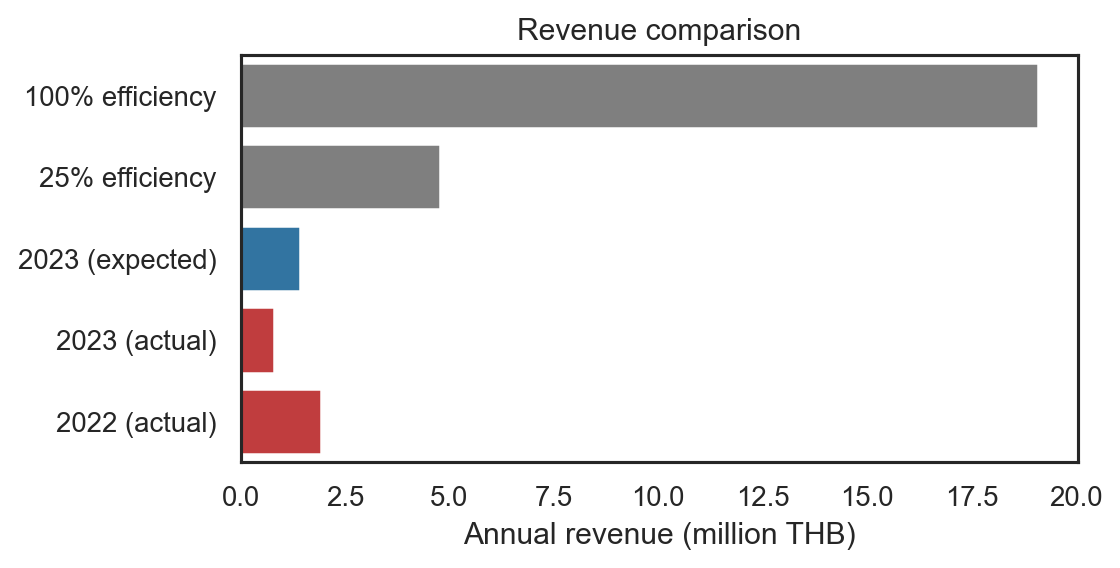

In [28]:
revenueComparison = pd.DataFrame({'Output': ['100% efficiency', '25% efficiency', '2023 (expected)','2023 (actual)','2022 (actual)'], 'Revenue': [max_sales2023, min_sales2023, est_sales2023, actualRev2023,actualRev2022]})
test = [x/1000000 for x in revenueComparison['Revenue']]
plt.figure(figsize=(6,3),dpi=180)
sns.set_theme(style='white')
ax = sns.barplot(revenueComparison,x=test,y="Output",orient="h",palette=["tab:gray","tab:gray","tab:blue","tab:red","tab:red"],hue='Output')
ax.set(xlabel = 'Annual revenue (million THB)',ylabel="",title="Revenue comparison")
plt.show()

This plot compares the revenue earned from current yields (actual) to potential projected yields, this also includes the simulated data from the SARIMAX prediction. <br>
As I drew only from a 1 year window, the rolling average price/month hovered around ~5 THB/kg for 2024's projection, reflecting 2023's expected revenue.

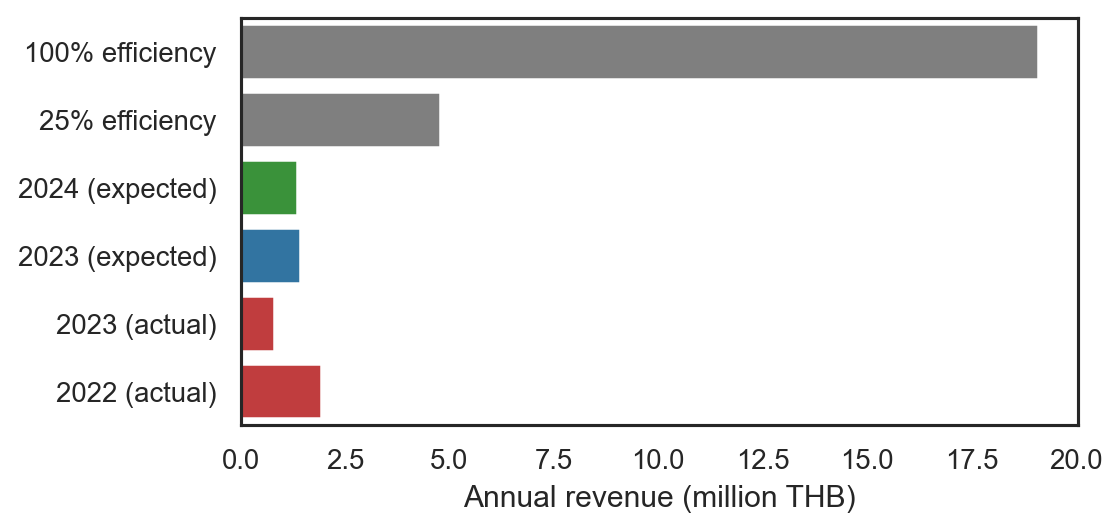

In [29]:
revenueComparison = pd.DataFrame({'Output': ['100% efficiency', '25% efficiency', '2024 (expected)','2023 (expected)','2023 (actual)','2022 (actual)'], 'Revenue': [max_sales2023, min_sales2023, est_sales2024, est_sales2023, actualRev2023,actualRev2022]})
test = [x/1000000 for x in revenueComparison['Revenue']]
plt.figure(figsize=(6,3),dpi=180)
sns.set_theme(style='white')
ax = sns.barplot(revenueComparison,x=test,y="Output",orient="h",palette=["tab:gray","tab:gray","tab:green","tab:blue","tab:red","tab:red"],hue='Output')
ax.set(xlabel = 'Annual revenue (million THB)',ylabel="")
plt.show()

# Drip irrigation predictions

If the plantation implements an irrigation system, particularly a drip system, current revenue would see a 56% increase from an annual revenue of ~800,000 THB to ~2.2 million THB. Not only is drip irrigation efficient for saving water, it is also inexpensive to set-up. <br>
Material cost for a drip irrigation system is quite low, for instance, a roll of 100m polyethylene tube costs approximately 450 THB (~15 USD/~10GBP), drip feeders are available in packages of tens and cost around 50THB/pack (1.5USD/1.2GBP) for non-adjustable flow rate variants.<br> Of course the plantation is somewhat large (16 hectares) and realistically a single 3.5m<sup>3</sup> well would not be sufficient to water the whole area.
Multiple sources of water is needed for this system to work at full efficiency, I also suggested the plantation to create ditches to retain rainwater which can be used as both a nutrient sink and an  irrigation source. Moreover, drip irrigation might not be as effective at controlling ambient temperature as compared to sprinklers, so ideally a combination of drip and sprinkling would be needed.

Interestingly, 2022 had better revenue even in the absence of an irrigation system. One explainable factor was that palm prices in 2022 ranged around 6 - 8 THB/kg, while in 2023 prices dropped to around 4 - 5 THB/kg (<a href="https://www.oae.go.th/assets/portals/1/files/price/monthly_price/palm.pdf">Office of Agriculture Economics; in Thai</a>). This accounts to approximately 50 - 60% difference in earnings and likely reflects 2023's poorer performance. Therefore, with an irrigation system implemented 2022's revenue could have achieved 3 million THB (up from 1.9 million THB).

In addition, by addressing other bottlenecks, such as harvesting methods and logistics — idiosyncratic to the plantation — and complemented by better management, higher yields can be achieved.

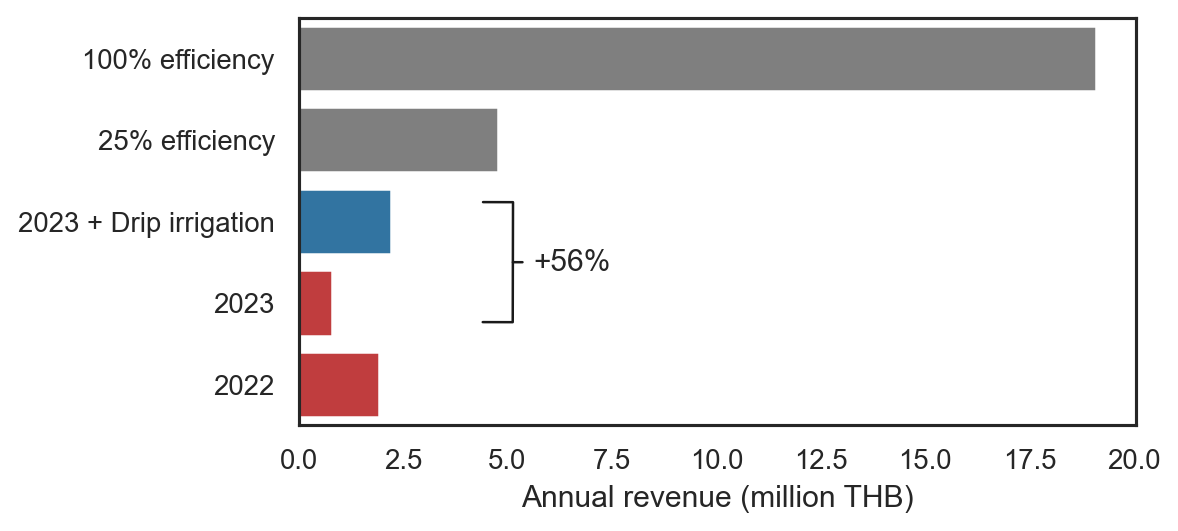

In [110]:
drip_Est_sales = float(sales2023df.loc['Total']['Actual est. sales']*1.56) # Irrigated palms see a average 56% increase in yield (Woitiezz, 2017; Carr, 2011)  
revenueComparison = pd.DataFrame({'Output': ['100% efficiency', '25% efficiency', '2023 + Drip irrigation','2023','2022'], 'Revenue': [max_sales2023, min_sales2023, drip_Est_sales, actualRev2023,actualRev2022]})
test = [x/1000000 for x in revenueComparison['Revenue']]
plt.figure(figsize=(6,3),dpi=180)
sns.set_theme(style='white')
ax = sns.barplot(revenueComparison,x=test,y="Output",orient="h",palette=["tab:gray","tab:gray","tab:blue","tab:red","tab:red"],hue='Output')
ax.set(xlabel = 'Annual revenue (million THB)',ylabel="")
ax.annotate('+56%',xy=(0.25,0.4),xytext=(0.28,0.38),xycoords='axes fraction',
            arrowprops=dict(arrowstyle='-[,widthB=2.0,lengthB=1',lw=1,color='k'))
plt.show()

In [113]:
print(drip_Est_sales)
drip_Est_sales/actualRev2023


2205450.0


2.7910093419623943

In [116]:
actualRev2022

1931861.5

In [1]:
((4767187.5-790198.0)/790198.0)*100

503.29025130410355

In [ ]:
revenueComparison.loc[1]

Output     25% efficiency
Revenue        4771406.25
Name: 1, dtype: object

# References

Agele, Samuel O., Friday E. Charles, Appolonia E. Obi, Ademola I. Agbona, Samuel O. Agele, Friday E. Charles, Appolonia E. Obi, and Ademola I. Agbona. “Oil Palm-Based Cropping Systems of the Humid Tropics: Addressing Production Sustainability, Resource Efficiency, Food Security and Livelihood Challenges.” In Elaeis Guineensis. IntechOpen, 2022. https://doi.org/10.5772/intechopen.98257. <br>**This paper was used to evaluate the benefits of intercropping to reduce soil erosion and improve total productivity.**

Chen, Chunfeng, Xin Zou, Ashutosh Kumar Singh, Xiai Zhu, Wanjun Zhang, Bin Yang, Xiaojin Jiang, and Wenjie Liu. “Effects of Hillslope Position on Soil Water Infiltration and Preferential Flow in Tropical Forest in Southwest China.” Journal of Environmental Management 299 (December 1, 2021): 113672. https://doi.org/10.1016/j.jenvman.2021.113672. <br>**This study covers background theory relevant to the plantation's locale, giving rise to the idea of creating a basin around the foothill for maximising water and nutrient retention.** 

Cerdà, Artemi, and Jesús Rodrigo-Comino. “Is the Hillslope Position Relevant for Runoff and Soil Loss Activation under High Rainfall Conditions in Vineyards?” Ecohydrology & Hydrobiology 20, no. 1 (January 1, 2020): 59–72. https://doi.org/10.1016/j.ecohyd.2019.05.006. <br>**Additional source for evaluating the benefits of intercropping and additional ecological methods to prevent soil erosion in hillslopes.**

Woittiez, Lotte S., Mark T. van Wijk, Maja Slingerland, Meine van Noordwijk, and Ken E. Giller. “Yield Gaps in Oil Palm: A Quantitative Review of Contributing Factors.” European Journal of Agronomy 83 (February 1, 2017): 57–77. https://doi.org/10.1016/j.eja.2016.11.002. <br> **Points out the typical yield gap for plantations with suboptimal conditions. Highlights several factors contributing to this challenge.**

Carr, M. K. V. “THE WATER RELATIONS AND IRRIGATION REQUIREMENTS OF OIL PALM (ELAEIS GUINEENSIS): A REVIEW.” Experimental Agriculture 47, no. 4 (October 2011): 629–52. https://doi.org/10.1017/S0014479711000494.
<br> **Discusses water management for oil palms.**